In [1]:
from collections import OrderedDict
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import epsilon_0, speed_of_light
from scipy.integrate import solve_ivp
from shapely.geometry import Polygon
from skfem import Basis, ElementTriP0, Mesh
from skfem.io import from_meshio

from femwell.maxwell.waveguide import compute_modes
from femwell.mesh import mesh_from_OrderedDict

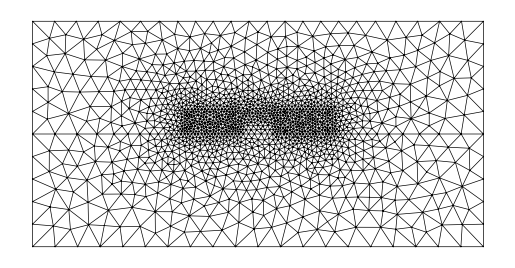

In [2]:
w_sim = 4
h_clad = 1
h_box = 1
w_core_1 = 0.45
w_core_2 = 0.46
gap = 0.4
h_core = 0.22
offset_heater = 2.2
h_heater = 0.14
w_heater = 2

wavelength = 1.55
k0 = 2 * np.pi / wavelength

polygons = OrderedDict(
    core_1=Polygon(
        [
            (-w_core_1 - gap / 2, 0),
            (-w_core_1 - gap / 2, h_core),
            (-gap / 2, h_core),
            (-gap / 2, 0),
        ]
    ),
    core_2=Polygon(
        [
            (w_core_2 + gap / 2, 0),
            (w_core_2 + gap / 2, h_core),
            (gap / 2, h_core),
            (gap / 2, 0),
        ]
    ),
    clad=Polygon(
        [
            (-w_sim / 2, 0),
            (-w_sim / 2, h_clad),
            (w_sim / 2, h_clad),
            (w_sim / 2, 0),
        ]
    ),
    box=Polygon(
        [
            (-w_sim / 2, 0),
            (-w_sim / 2, -h_box),
            (w_sim / 2, -h_box),
            (w_sim / 2, 0),
        ]
    ),
)

resolutions = dict(
    core_1={"resolution": 0.03, "distance": 1},
    core_2={"resolution": 0.03, "distance": 1},
)

mesh = from_meshio(
    mesh_from_OrderedDict(polygons, resolutions, filename="mesh.msh", default_resolution_max=0.2)
)
mesh.draw().show()

/tmp/ipykernel_81565/3693127342.py:7: DeprecationWarning: The behavior of passing an array directly to `show` is deprecated and will be removed in the future. Use `plot` instead.
  modes_both[0].show(modes_both[0].E.real, direction="x")


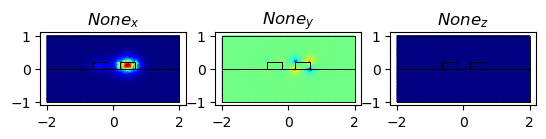

/tmp/ipykernel_81565/3693127342.py:8: DeprecationWarning: The behavior of passing an array directly to `show` is deprecated and will be removed in the future. Use `plot` instead.
  modes_both[1].show(modes_both[1].E.real, direction="x")


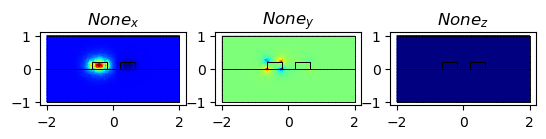

Refractive index of symmetric and assymetric mode: (2.371121371079285+0j) ,  (2.349170333123298+0j)
Maximum power transfer after 35.30584756647525 um prop length


In [3]:
basis0 = Basis(mesh, ElementTriP0(), intorder=4)

epsilon = basis0.zeros() + 1.444**2
epsilon[basis0.get_dofs(elements=("core_1", "core_2"))] = 3.4777**2
# basis0.plot(epsilon, colorbar=True).show()
modes_both = compute_modes(basis0, epsilon, wavelength=wavelength, mu_r=1, num_modes=2)
modes_both[0].show(modes_both[0].E.real, direction="x")
modes_both[1].show(modes_both[1].E.real, direction="x")
print(
    "Refractive index of symmetric and assymetric mode:",
    modes_both[0].n_eff,
    ", ",
    modes_both[1].n_eff,
)
# https://www.fiberoptics4sale.com/blogs/wave-optics/directional-couplers
print(
    f"Maximum power transfer after {np.pi / (2 * np.pi / wavelength * np.real(modes_both[0].n_eff - modes_both[1].n_eff))} um prop length"
)

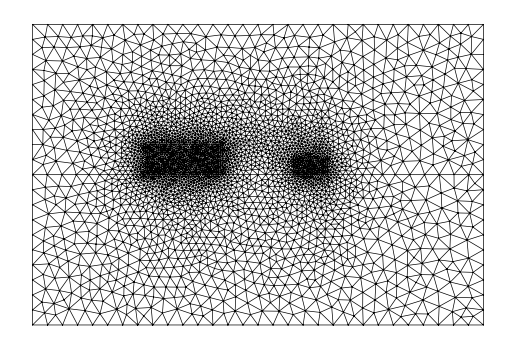

In [4]:
w_sim = 6
h_clad = 2
h_box = 2
w_sin = 1
w_si = 0.4
gap = 1.0
h_sin = 0.4
h_si = 0.22

wavelength = 1.55
k0 = 2 * np.pi / wavelength

polygons = OrderedDict(
    sin=Polygon(
        [
            (-w_sin - gap / 2, 0),
            (-w_sin - gap / 2, h_sin),
            (-gap / 2, h_sin),
            (-gap / 2, 0),
        ]
    ),
    si=Polygon(
        [
            (w_si + gap / 2, 0),
            (w_si + gap / 2, h_si),
            (gap / 2, h_si),
            (gap / 2, 0),
        ]
    ),
    clad=Polygon(
        [
            (-w_sim / 2, 0),
            (-w_sim / 2, h_clad),
            (w_sim / 2, h_clad),
            (w_sim / 2, 0),
        ]
    ),
    box=Polygon(
        [
            (-w_sim / 2, 0),
            (-w_sim / 2, -h_box),
            (w_sim / 2, -h_box),
            (w_sim / 2, 0),
        ]
    ),
)

resolutions = dict(
    sin={"resolution": 0.03, "distance": 1},
    si={"resolution": 0.03, "distance": 1},
)

mesh = from_meshio(
    mesh_from_OrderedDict(polygons, resolutions, filename="mesh.msh", default_resolution_max=0.2)
)
mesh.draw().show()

In [5]:
basis0 = Basis(mesh, ElementTriP0(), intorder=4)

epsilon = basis0.zeros() + 1.444**2
epsilon[basis0.get_dofs(elements=("si"))] = 3.4777**2
epsilon[basis0.get_dofs(elements=("sin"))] = 1.973**2

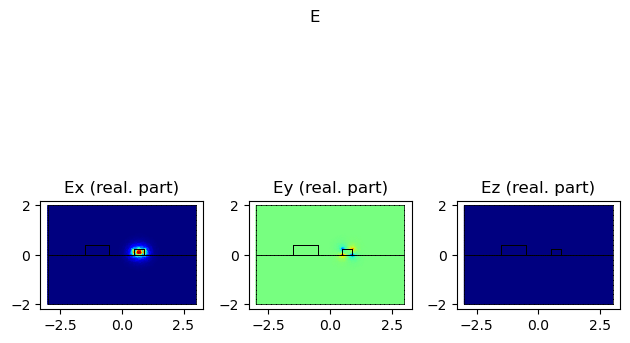

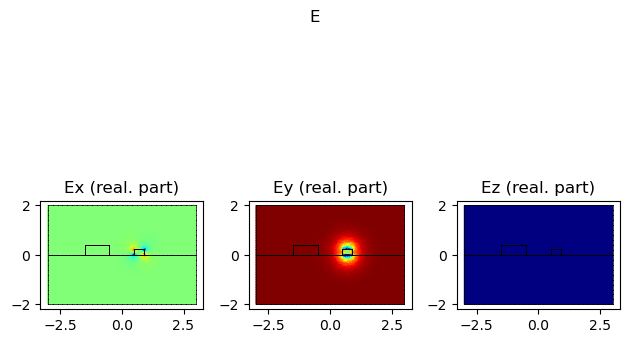

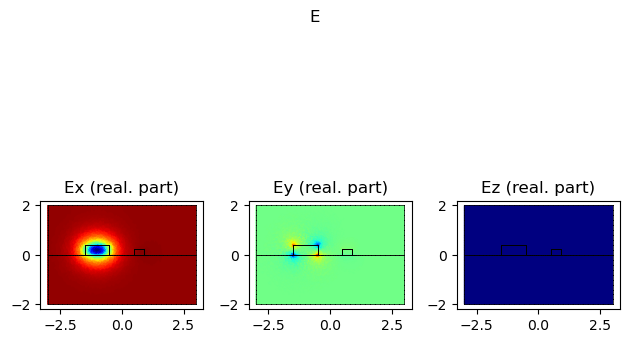

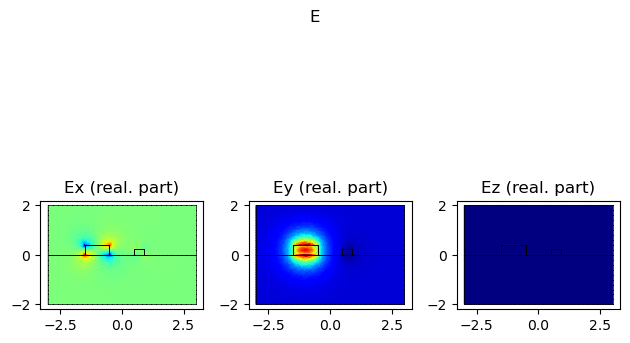

The effective index of the SiN mode is 1.6206394302704035


In [6]:
# basis0.plot(epsilon, colorbar=True).show()
modes = compute_modes(basis0, epsilon, wavelength=wavelength, num_modes=4)

for mode in modes:
    mode.show("E", part="real")

print(f"The effective index of the SiN mode is {np.real(modes[2].n_eff)}")